# Table of Contents
| Section                      | Subsections                |
|-------------------------------|----------------------------|
| [Exploratory Data Analysis](#exploratory-data-analysis) | [Data Cleaning](#data-cleaning), [Data Visualization](#data-visualization) |
| [Feature Engineering](#feature-engineering) | [Creating New Features](#creating-new-features), [Transformations](#transformations) |

## Introduction

Critical minerals are crucial for technologies that drive global energy, security, and economic systems. This exploratory analysis will focus on Rare Earth Elements (REEs), highlighting their unique and essential properties. Here are some key points to consider:

- The concentration of REE production primarily in China ([figure 1](https://unctad.org/publication/digital-economy-report-2024)) exposes global supply chains to geopolitical and logistical vulnerabilities, underscoring the need for diversified supply sources [[INN](https://investingnews.com/rare-earths-forecast/)].

- According to the IEA’s Global Critical Minerals Outlook, the major concern in the rare earths sector is not the demand-supply gap but the high geographical concentration of mining and refining activities. This concentration significantly heightens the risk of supply disruptions in the market [[INN](https://investingnews.com/rare-earths-forecast/)].

- Strategically, governments are increasingly viewing REEs as critical minerals, prompting investments across the exploration, extraction, and processing stages of the rare earth supply chain [[MN](https://www.miningnewswire.com/three-key-trends-that-could-impact-rare-earths-in-2024/)]. 

## Exploratory Data Analysis

Given these former considerations, this analysis aims to contribute to the diversification efforts by mapping and evaluating potential new sources of REEs in British Columbia. 
The workflow of the analysis is outlined as follows:

- **Square Buffer Creation**: Identifies and delineates zones around points of interest likely to contain mineral deposits.
- **Zonal Statistics**: Quantifies geological characteristics within each buffer, providing essential data for further analysis.
- **Kernel Density Estimation (KDE)**: Clusters analyzed zones based on geological similarities to identify areas with the highest potential.
- **Random Forest Modeling**: Develops predictive models to estimate mineral presence, optimizing exploration strategies.

In [1]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, box
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#getting the points of interest. "RS" = Rare Earth Elements 
bc_cm = gpd.read_file(r'datasets\shp\cmBC.shp') # These is a gdf with 65 points of Critical Minerals in BC
ree = bc_cm[bc_cm['COMMOD_C1'] == 'RS'].copy()
ree

,STATUS_D,COMMOD_C1,COMMOD_C2,COMMOD_C3,DEPTYPE_D1,rock_class,strat_unit,rock_type,age_max,age_min,belt,geometry
18,Showing,RS,LA,ND,Carbonatite-hosted deposits,metamorphic rocks,DPBC,"mudstone, siltstone, shale fine clastic sedime...",Late Devonian,Late Permian,Intermontane,POINT (1533321.934 685538.979)
19,Showing,RS,TH,UR,None,sedimentary rocks,DPBC,"mudstone, siltstone, shale fine clastic sedime...",Upper Devonian,Permian,Omineca,POINT (1554227.408 678377.172)
38,Showing,RS,YR,NB,None,sedimentary rocks,DPBC,"mudstone, siltstone, shale fine clastic sedime...",Upper Devonian,Permian,Omineca,POINT (1671122.954 727332.681)
56,Showing,RS,YR,None,Rare element pegmatite - NYF family,metamorphic rocks,DPBC,"mudstone, siltstone, shale fine clastic sedime...",Late Devonian,Late Permian,Intermontane,POINT (1124092.749 1179933.558)
61,Showing,RS,CE,ND,Carbonatite-hosted deposits,sedimentary rocks,DPBC,"mudstone, siltstone, shale fine clastic sedime...",Upper Devonian,Permian,Omineca,POINT (1138425.423 1277066.058)
64,Showing,RS,YR,None,None,sedimentary rocks,DPBC,"mudstone, siltstone, shale fine clastic sedime...",Upper Devonian,Permian,Omineca,POINT (912433.048 1526060.694)


### Square buffers


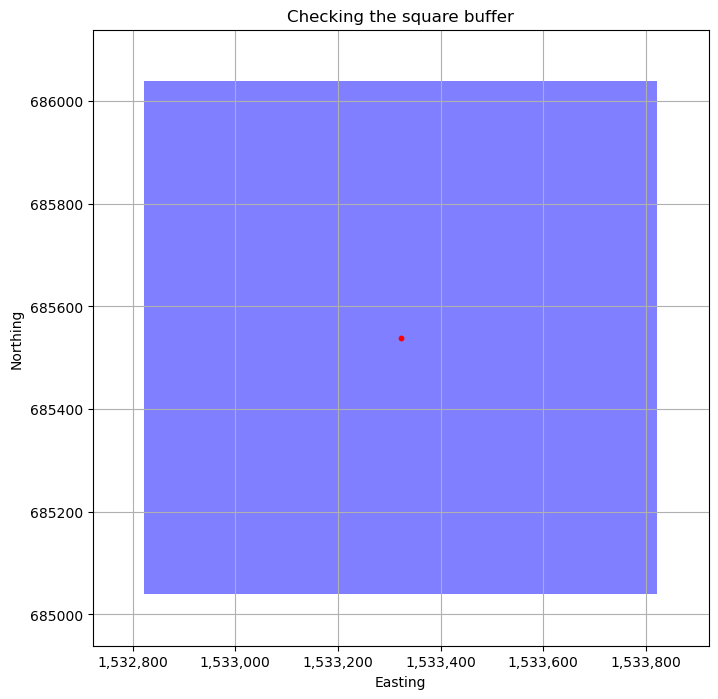

In [2]:
buffer_size = 1000   # 1000 meters which is raster min resolution

def create_square_buffer(point, size):
    return box(
        point.x - size / 2,
        point.y - size / 2,
        point.x + size / 2,
        point.y + size / 2
    )
ree['buffer_box'] = ree.geometry.apply(lambda x: create_square_buffer(x, buffer_size))
buffer_cm = ree[ree['buffer_box'].geom_type == 'Polygon'] #geoDataframe of polygons!

###Visualize a "zoom" of the output
point_of_zoom = buffer_cm.iloc[0]

#set limits for the zoom by getting the bounds of the square buffer
buffer_extent = point_of_zoom['buffer_box'].bounds
margen = 100 


fig, ax = plt.subplots(figsize=(8, 8))
buffer_cm.set_geometry('buffer_box').plot(ax=ax, alpha=0.5, color='blue')
buffer_cm.plot(ax=ax, color='red', markersize=10)
ax.set_xlim(buffer_extent[0] - margen, buffer_extent[2] + margen)
ax.set_ylim(buffer_extent[1] - margen, buffer_extent[3] + margen)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')) # For x axis to show the whole number


plt.title('Checking the square buffer')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.grid(True)
plt.show()

#### Generating grid of polygons covering BC


C:\Users\Carolina\AppData\Local\Temp\ipykernel_13036\81870640.py:12: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == 'Polygon':
C:\Users\Carolina\AppData\Local\Temp\ipykernel_13036\81870640.py:14: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geometry.type == 'MultiPolygon':


Tolerancia 250:
 - Número de vértices original: 572727
 - Número de vértices simplificado: 29983


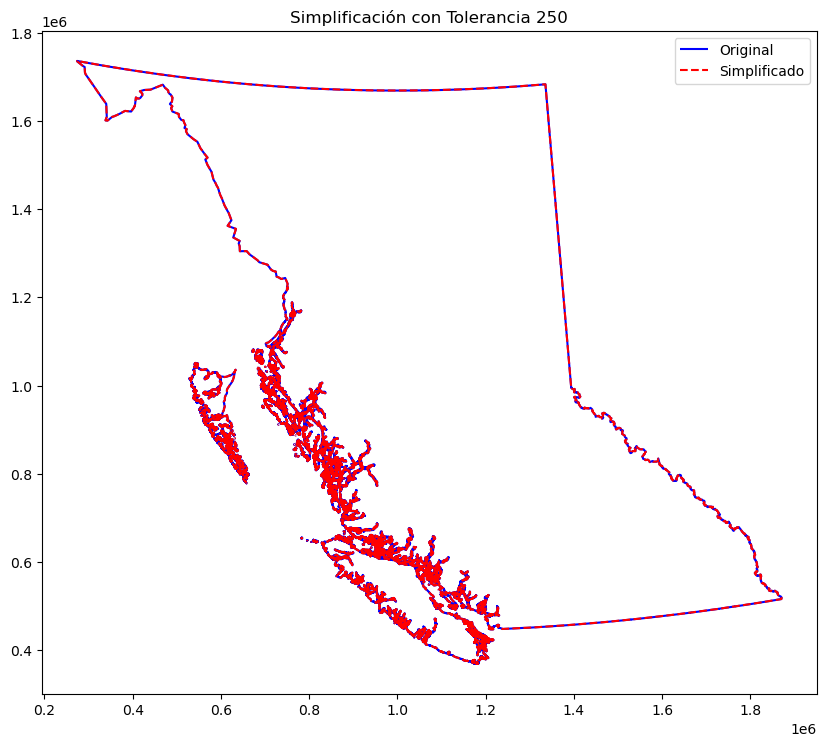

C:\Users\Carolina\AppData\Local\Temp\ipykernel_13036\81870640.py:12: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == 'Polygon':
C:\Users\Carolina\AppData\Local\Temp\ipykernel_13036\81870640.py:14: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geometry.type == 'MultiPolygon':


Tolerancia 300:
 - Número de vértices original: 572727
 - Número de vértices simplificado: 26836


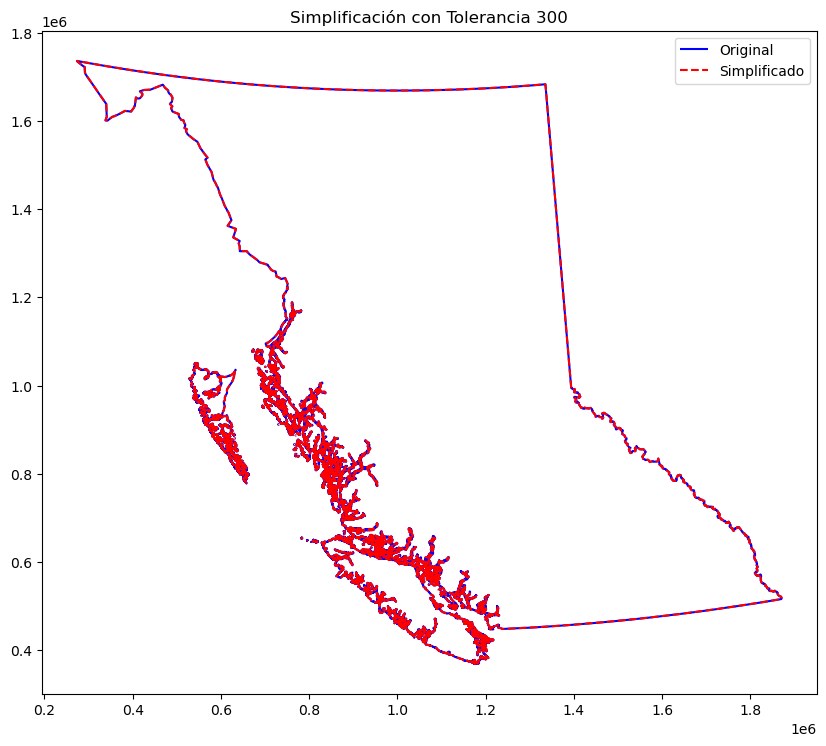

C:\Users\Carolina\AppData\Local\Temp\ipykernel_13036\81870640.py:12: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == 'Polygon':
C:\Users\Carolina\AppData\Local\Temp\ipykernel_13036\81870640.py:14: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geometry.type == 'MultiPolygon':


Tolerancia 400:
 - Número de vértices original: 572727
 - Número de vértices simplificado: 22929


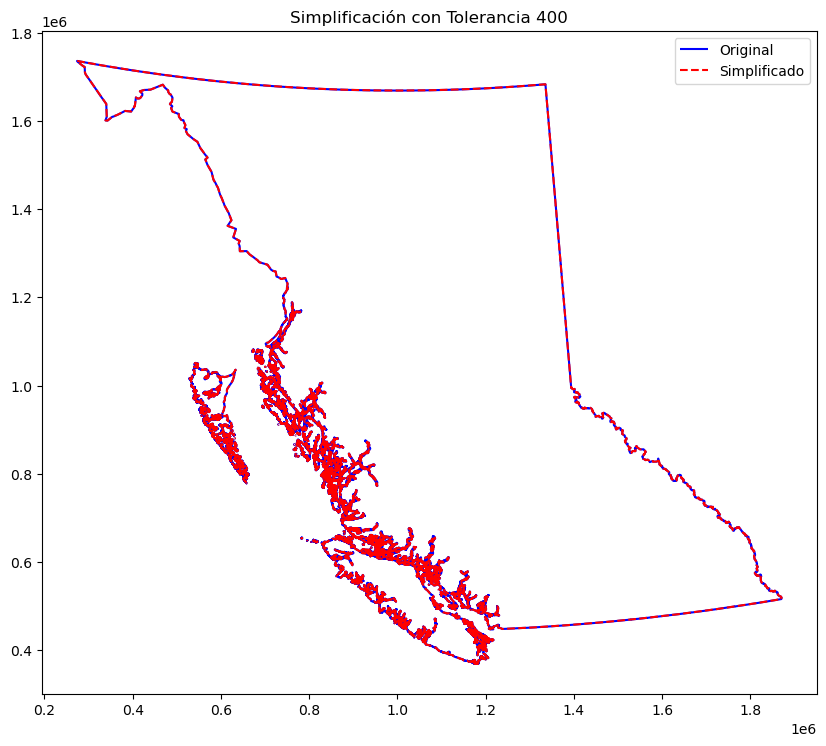

In [16]:

bc = gpd.read_file(r'datasets\shp\bc_polygon.shp')

import geopandas as gpd
import matplotlib.pyplot as plt

import geopandas as gpd
import matplotlib.pyplot as plt

# Definición de la función para contar vértices
def count_vertices(geometry):
    count = 0
    if geometry.type == 'Polygon':
        count += len(geometry.exterior.coords)
    elif geometry.type == 'MultiPolygon':
        # Acceder a cada Polygon dentro de un MultiPolygon usando .geoms
        for poly in geometry.geoms:
            count += len(poly.exterior.coords)
    return count



# Simplificar con diferentes tolerancias
for tolerance in [250, 300, 400]:
    simplified_bc = bc.copy()
    simplified_bc['geometry'] = bc.geometry.simplify(tolerance, preserve_topology=True)
    
    # Contar vértices
    original_vertices = sum(count_vertices(geom) for geom in bc.geometry)
    simplified_vertices = sum(count_vertices(geom) for geom in simplified_bc.geometry)
    
    print(f"Tolerancia {tolerance}:")
    print(f" - Número de vértices original: {original_vertices}")
    print(f" - Número de vértices simplificado: {simplified_vertices}")
    
    # Visualización
    fig, ax = plt.subplots(figsize=(10, 10))
    bc.boundary.plot(ax=ax, color='blue', label='Original')
    simplified_bc.boundary.plot(ax=ax, color='red', linestyle='--', label='Simplificado')
    plt.title(f"Simplificación con Tolerancia {tolerance}")
    plt.legend()
    plt.show()


In [ ]:
import geopandas as gpd
from shapely.geometry import Point, box
import matplotlib.pyplot as plt
from shapely.ops import unary_union
import os

# Load the British Columbia boundary shapefile
bc = gpd.read_file(r'datasets\shp\bc_polygon.shp')


##Simplied geometry
bc['geometry'] = bc.geometry.simplify(400, preserve_topology=True)
# Get the bounding box coordinates of the British Columbia shapefile
minx, miny, maxx, maxy = bc.total_bounds
print(f"BC bounds: {minx}, {miny}, {maxx}, {maxy}")

# Generate coordinates to create a grid within the BC bounds
x_coords = list(range(int(minx), int(maxx) + buffer_size, buffer_size))
y_coords = list(range(int(miny), int(maxy) + buffer_size, buffer_size))

# Initialize a list to store the squares for the grid
grid_polygons = []
total_operations = len(x_coords) * len(y_coords)
operation_count = 0

# Loop through the x and y coordinates
for x in x_coords:
    for y in y_coords:
        # Create a square centered at each (x, y) coordinate
        square = create_square_buffer(Point(x + buffer_size / 2, y + buffer_size / 2), buffer_size)
        grid_polygons.append(square)
        operation_count += 1
        if operation_count % 100000 == 0:  # update each 100000 operations
            print(f"Progress: {operation_count}/{total_operations} squares created.")

# Create a GeoDataFrame with all the squares
grid_no_cm = gpd.GeoDataFrame(geometry=grid_polygons, crs=bc.crs)
##Spatial index for optimization of sjoin processing
bc.sindex
grid_no_cm.sindex

# Overlay the grid with the BC boundary to retain only squares that are within BC
print(f'Intersecting with BC polygon ........ \nthis will take a while .................\n..................................')
grid_no_cm = gpd.sjoin(grid_no_cm, bc, how="inner", op='within')
grid_no_cm.to_file(r'datasets\shp\grid_no_bc')

# Print the total number of cells in the grid that are within BC boundaries
print(f"Grid created. Total cells: {len(grid_no_cm)}")


In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))  # Configura el tamaño del plot según necesites

# Dibuja el polígono de British Columbia
bc.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=1, alpha=0.5, label='BC Boundary')

# Dibuja los cuadrados sobre el mapa
grid_no_cm.plot(ax=ax, color='red', alpha=0.5, label='Grid Squares')

# Configura leyendas y títulos
ax.set_title('Grid Squares within British Columbia')
ax.legend()

# Elimina los ejes para una mejor visualización
ax.set_axis_off()

plt.show()

In [6]:

grid_no_cm.drop(columns=['index_right', 'PRUID', 'PRNAME', 'PRENAME', 'PRFNAME',
       'PREABBR', 'PRFABBR'])
grid_no_cm.to_file(r'datasets\shp\grid_no_bc.shp')


C:\Users\Carolina\AppData\Local\Temp\ipykernel_13036\1596278560.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  grid_no_cm.to_file(r'datasets\shp\grid_no_bc.shp')


zonal statistics

In [ ]:

# # Intersectar la cuadrícula con el polígono de BC
# print("Intersecting grid with BC polygon to clip the grid within BC boundaries...")
# grid_gdf = gpd.overlay(grid_gdf, bc, how='intersection')
# print(f"Grid clipped to BC boundaries. Total cells after clipping: {len(grid_gdf)}")

# # 4. Excluir las zonas mineralizadas de la cuadrícula usando overlay (evitar superposición)
# print("Excluding mineralized buffers from the grid...")

# # Unir los buffers mineralizados para excluirlos
# mineralized_union = unary_union(bc_cm.geometry)

# # Crear la cuadrícula no mineralizada, excluyendo las zonas mineralizadas
# non_mineralized_grid = grid_gdf[~grid_gdf.intersects(mineralized_union)]
# print(f"Non-mineralized grid created. Total non-mineralized cells: {len(non_mineralized_grid)}")

# # 5. Guardar la cuadrícula no mineralizada como un nuevo shapefile
# print(f"Saving non-mineralized grid to {output_non_mineralized_grid}...")
# non_mineralized_grid.to_file(output_non_mineralized_grid)
# print("Non-mineralized grid shapefile saved successfully.")

# # 6. Realizar estadísticas zonales (ejemplo con un raster)
# from rasterstats import zonal_stats

# raster_path = "path_to_geophysical_data.tif"  # Reemplaza con la ruta correcta

# print("Calculating zonal statistics for non-mineralized grid...")
# # Calcular estadísticas zonales (por ejemplo, promedio) para cada polígono
# stats = zonal_stats(output_non_mineralized_grid, raster_path, stats=['mean', 'min', 'max'], nodata=-9999)

# # Convertir las estadísticas a un DataFrame
# import pandas as pd

# print("Converting zonal statistics to DataFrame...")
# stats_df = pd.DataFrame(stats)
# print("Zonal statistics calculated.")

# # Añadir las estadísticas al GeoDataFrame de no mineralizados
# print("Adding zonal statistics to GeoDataFrame...")
# non_mineralized_grid = non_mineralized_grid.reset_index(drop=True)
# non_mineralized_grid = pd.concat([non_mineralized_grid, stats_df], axis=1)
# print("Zonal statistics added to GeoDataFrame.")

# # Opcional: Guardar el GeoDataFrame con las estadísticas como shapefile o GeoJSON
# output_with_stats = "bc_non_mineralized_grid_with_stats.shp"
# print(f"Saving non-minalized grid with statistics to {output_with_stats}...")
# non_mineralized_grid.to_file(output_with_stats)
# print("Non-mineralized grid with statistics shapefile saved successfully.")

# # Mostrar un resumen
# print("Summary:")
# print(f"Total mineralized buffers: {len(mineralized_buffers)}")
# print(f"Total non-mineralized grid cells: {len(non_mineralized_grid)}")


por alguna razon me dijo en mi pc que tenia que alinearlos, dejo aqui por si se vuelve a necesitar pero no esta en ninguna parte mas del analisis

In [ ]:
import rasterio

# Get the common extent (intersection) of all rasters
min_x, min_y, max_x, max_y = None, None, None, None

for raster_path in raster_paths:
    with rasterio.open(raster_path) as src:
        bounds = src.bounds
        if min_x is None:
            min_x, min_y, max_x, max_y = bounds.left, bounds.bottom, bounds.right, bounds.top
        else:
            min_x = max(min_x, bounds.left)
            min_y = max(min_y, bounds.bottom)
            max_x = min(max_x, bounds.right)
            max_y = min(max_y, bounds.top)

# Print the common extent
print(f"Common extent: min_x={min_x}, min_y={min_y}, max_x={max_x}, max_y={max_y}")


In [ ]:
import rasterio
from rasterio.enums import Resampling
from rasterio.transform import from_bounds

def align_raster_to_common_extent(raster_path, common_extent, target_resolution):
    with rasterio.open(raster_path) as src:
        # Calculate the transform based on the common extent and target resolution
        min_x, min_y, max_x, max_y = common_extent
        width = int((max_x - min_x) / target_resolution)
        height = int((max_y - min_y) / target_resolution)
        transform = from_bounds(min_x, min_y, max_x, max_y, width, height)

        # Define new metadata with common extent and resolution
        meta = src.meta.copy()
        meta.update({
            'driver': 'GTiff',
            'height': height,
            'width': width,
            'transform': transform,
            'crs': src.crs,
            'count': src.count
        })

        # Read and resample the raster data to the new extent and resolution
        data = src.read(
            out_shape=(src.count, height, width),
            resampling=Resampling.nearest
        )

        # Save the resampled raster
        resampled_raster_path = os.path.join("datasets/raster/aligned", f"aligned_{os.path.basename(raster_path)}")
        with rasterio.open(resampled_raster_path, "w", **meta) as dst:
            dst.write(data)
        
        print(f"Aligned and saved: {resampled_raster_path}")

# Apply the alignment to each raster
common_extent = (min_x, min_y, max_x, max_y)  # Use the extent you obtained earlier
target_resolution = 1000  # Your raster resolution
for raster_path in raster_paths:
    align_raster_to_common_extent(raster_path, common_extent, target_resolution)


## Feature Engineering